<h1 style="text-align:center; font-weight:bold;">Covid-19 Data Analysis</h1>

<img src="resources/Covid-19.png" width="1200" height="475">

<h1 style="text-align:left; font-weight:bold">Explanation:</h1>

- What is Covid-19 ?
  - COVID-19 (short for "coronavirus disease 2019") is a respiratory illness caused by the SARS-CoV-2 virus. It was first identified in Wuhan, China in December 2019 and has since spread to become a global pandemic.
- Symptoms of Covid-19 ?
  - Symptoms of COVID-19 can range from mild to severe and include fever, cough, shortness of breath, body aches, fatigue, and loss of taste or smell. Some people may be asymptomatic or have very mild symptoms, while others may develop severe illness or complications such as pneumonia, acute respiratory distress syndrome, or organ failure.

<h1 style="text-align:left; font-weight:bold">Objectives:</h1>

**1.**    Find the total population of the world continent wise.            
**2.**    Find the highest number of total covid-19 cases, total deaths and positive rate in the world continent wise.     
**3.**    Compare the results of the above two objectives. And determine, Total popultion is directly proportional to the number of total covid-19 cases, total deaths, positive rate and life expectancy.       
**4.**    Who are more Smokers?   Males or Females?                

<h1 style="text-align:left; font-weight:bold">Setup</h1>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h1 style="text-align:left; font-weight:bold">Data Wrangling</h1>

Loading the DataSet and checking Basic information about the DataSet

In [2]:
# Import data from csv file
df = pd.read_csv('owid-covid-data.csv')
df.head()

,continent,total_cases,total_deaths,total_tests,positive_rate,female_smokers,male_smokers,life_expectancy,population
0,Asia,5.0,NaN,NaN,NaN,NaN,NaN,64.83,41128772.0
1,Asia,5.0,NaN,NaN,NaN,NaN,NaN,64.83,41128772.0
2,Asia,5.0,NaN,NaN,NaN,NaN,NaN,64.83,41128772.0
3,Asia,5.0,NaN,NaN,NaN,NaN,NaN,64.83,41128772.0
4,Asia,5.0,NaN,NaN,NaN,NaN,NaN,64.83,41128772.0


In [3]:
# Check the number of rows and columns
rows,cols = df.shape
print('Number of rows: ', rows)
print('Number of columns: ', cols)

Number of rows:  246487
Number of columns:  9


In [4]:
# Checking for missing values and percentage of missing values
df.isnull().sum() / df.shape[0] * 100

continent           5.621392
total_cases         5.715920
total_deaths       13.614511
total_tests        67.792622
positive_rate      61.082329
female_smokers     39.075489
male_smokers       39.909204
life_expectancy     8.260882
population          0.429232
dtype: float64

In [5]:
# To get all columns names
df.columns

Index(['continent', 'total_cases', 'total_deaths', 'total_tests',
       'positive_rate', 'female_smokers', 'male_smokers', 'life_expectancy',
       'population'],
      dtype='object')

In [6]:
# We will replace the missing values with the mean/mode numeric asdf0 column
# And categorical columns with the mode of the column

# Replacing nan values with mode of continent
most_frequent_value = df['continent'].value_counts()[0]
df['continent'] = df['continent'].fillna(most_frequent_value)

#Replacing nan values with median of total cases
median = df['total_cases'].median()
df['total_cases'] = df['total_cases'].replace(np.nan, median)

#Replacing nan values with median of total deaths 
median = df['total_deaths'].median()
df['total_deaths'] = df['total_deaths'].replace(np.nan, median)

#Replacing nan values with median of total tests
median = df['total_tests'].median()
df['total_tests'] = df['total_tests'].replace(np.nan, median)

#Replacing nan values with median of positive rate
median = df['positive_rate'].median()
df['positive_rate'] = df['positive_rate'].replace(np.nan, median)

# Replacing nan values with median of male smokers
median = df['male_smokers'].median()
df['male_smokers'] = df['male_smokers'].replace(np.nan, median)

# Replacing nan values with median of female smokers
median = df['female_smokers'].median()
df['female_smokers'] = df['female_smokers'].replace(np.nan, median)

# Replacing nan values with median of life expectancy
median = df['life_expectancy'].median()
df['life_expectancy'] = df['life_expectancy'].replace(np.nan, median)

# Replacing nan values with median of population
median = df['population'].median()
df['population'] = df['population'].replace(np.nan, median)

In [7]:
df.isnull().sum()

continent          0
total_cases        0
total_deaths       0
total_tests        0
positive_rate      0
female_smokers     0
male_smokers       0
life_expectancy    0
population         0
dtype: int64

In [8]:
# Checking for duplicates
df = df.drop_duplicates()
df.duplicated().any()

False

In [9]:
df.shape

(173431, 9)

**Now our data is wrangled and cleaned, we can start our analysis.**

<h1 style="text-align:left; font-weight:bold">Continent wise Analysis</h1>

<h1 style="text-align:left; font-weight:bold">Total Population of world continent wise</h1>

In [10]:
#  Continent wise Population
df_continent_total_pop = df.groupby('continent')['population'].sum().reset_index()
df_continent_total_pop.drop(0, inplace=True)
df_continent_total_pop

,continent,population
1,Africa,1.098662e+12
2,Asia,4.774289e+12
3,Europe,7.306412e+11
4,North America,6.017880e+11
5,Oceania,3.793788e+10
6,South America,4.046543e+11


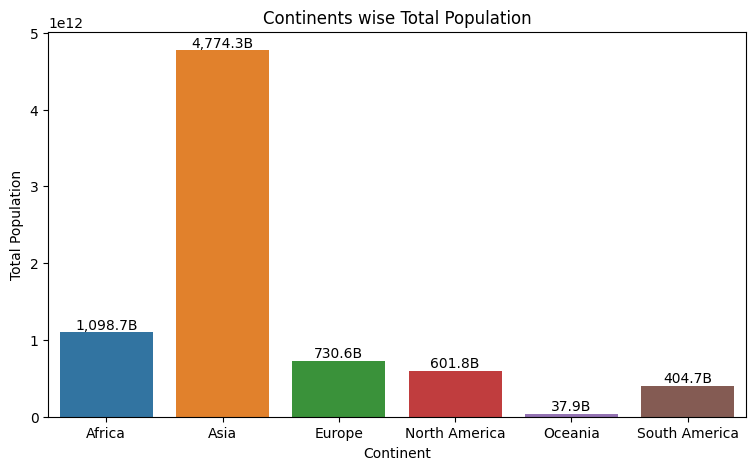

In [11]:
plt.figure(figsize=(9,5))
sns.barplot(x='continent', y='population', data=df_continent_total_pop)
plt.xlabel('Continent')
plt.ylabel('Total Population')
plt.title('Continents wise Total Population')

# add data labels to the bars
for i in range(len(df_continent_total_pop)):
    plt.annotate('{:,.1f}B'.format(df_continent_total_pop.iloc[i]['population']/1000000000), (i,df_continent_total_pop.iloc[i]['population']), ha='center',va='bottom')
plt.show()


<h1 style="text-align:left; font-weight:bold">Total Cases Continent wise</h1>

In [12]:
#  Continent wise total cases
df_continent_total_cases = df.groupby('continent')['total_cases'].sum().reset_index()
df_continent_total_cases.drop(0, inplace=True)
df_continent_total_cases

,continent,total_cases
1,Africa,5.444465e+09
2,Asia,7.248558e+10
3,Europe,7.799130e+10
4,North America,5.391374e+10
5,Oceania,3.170224e+09
6,South America,2.720911e+10


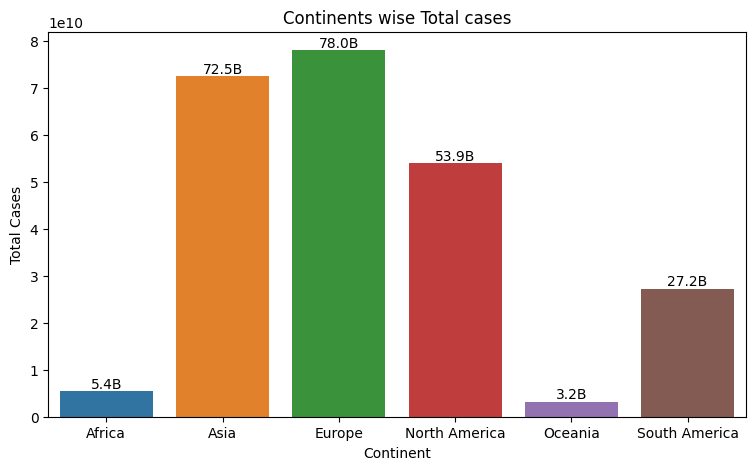

In [13]:
plt.figure(figsize=(9,5))
sns.barplot(x='continent', y='total_cases', data=df_continent_total_cases)
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.title('Continents wise Total cases')

# add data labels to the bars
for i in range(len(df_continent_total_cases)):
    plt.annotate('{:,.1f}B'.format(df_continent_total_cases.iloc[i]['total_cases']/1000000000), (i,df_continent_total_cases.iloc[i]['total_cases']), ha='center',va='bottom')
plt.show()

<h1 style="text-align:left; font-weight:bold">Total Deaths Continent wise</h1>

In [14]:
# # Continent wise total deaths
df_continent_total_death = df.groupby('continent')['total_deaths'].sum().reset_index()
df_continent_total_death.drop(0, inplace=True)
df_continent_total_death

,continent,total_deaths
1,Africa,1.271766e+08
2,Asia,7.999614e+08
3,Europe,1.045300e+09
4,North America,8.911438e+08
5,Oceania,7.739442e+06
6,South America,7.361708e+08


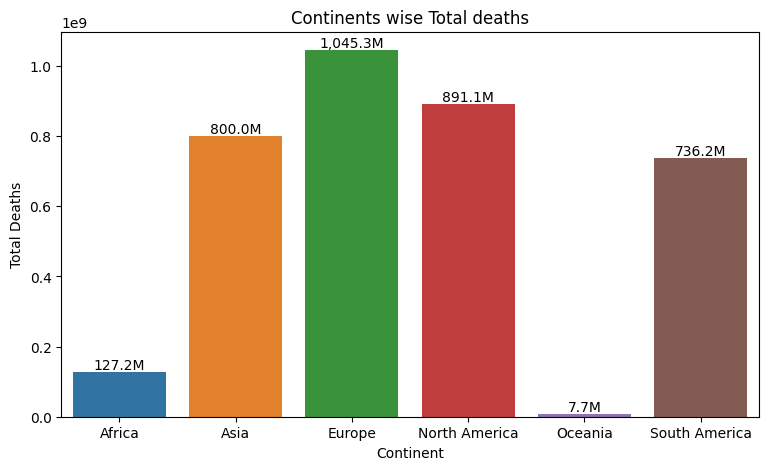

In [15]:
plt.figure(figsize=(9,5))
sns.barplot(x='continent', y='total_deaths', data=df_continent_total_death)
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.title('Continents wise Total deaths')

# add data labels to the bars
for i in range(len(df_continent_total_death)):
    plt.annotate('{:,.1f}M'.format(df_continent_total_death.iloc[i]['total_deaths']/1000000), (i,df_continent_total_death.iloc[i]['total_deaths']), ha='center',va='bottom')
plt.show()


<h1 style="text-align:left; font-weight:bold">Total Positive Rate Continent wise</h1>

In [16]:
# # Continent wise Positivity rate
df_continent_positive_rate = df.groupby('continent')['positive_rate'].sum().reset_index()
df_continent_positive_rate.drop(0, inplace=True)
df_continent_positive_rate

,continent,positive_rate
1,Africa,2342.9320
2,Asia,2926.5749
3,Europe,3893.6084
4,North America,2155.5299
5,Oceania,410.3012
6,South America,1303.7658


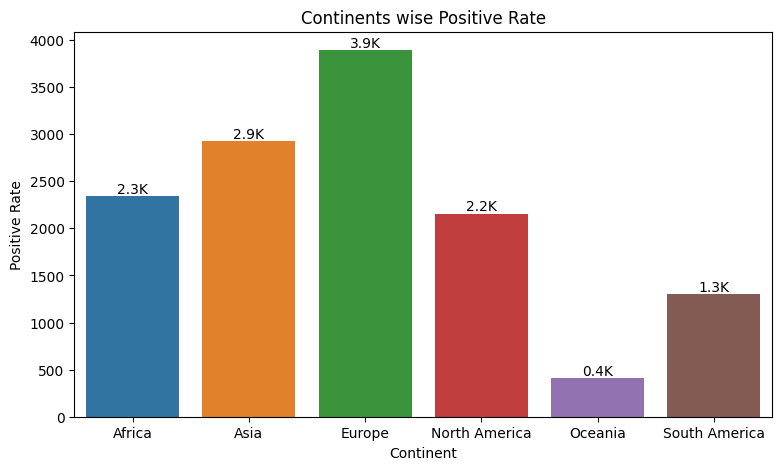

In [17]:
plt.figure(figsize=(9,5))
sns.barplot(x='continent', y='positive_rate', data=df_continent_positive_rate )
plt.xlabel('Continent')
plt.ylabel('Positive Rate')
plt.title('Continents wise Positive Rate')

#add data labels to the bars
for i in range(len(df_continent_positive_rate)):
    plt.annotate('{:,.1f}K'.format(df_continent_positive_rate.iloc[i]['positive_rate']/1000), (i,df_continent_positive_rate.iloc[i]['positive_rate']), ha='center',va='bottom')
plt.show()


<h1 style="text-align:left; font-weight:bold">Continent wise Life expectancy</h1>

In [18]:
# Continent wise life expectancy
df_continent_life_expectancy = df.groupby('continent')['life_expectancy'].sum().reset_index()
df_continent_life_expectancy.drop(0, inplace=True)
df_continent_life_expectancy


,continent,life_expectancy
1,Africa,2346838.68
2,Asia,3177273.51
3,Europe,3439513.17
4,North America,1665799.74
5,Oceania,486070.97
6,South America,807949.63


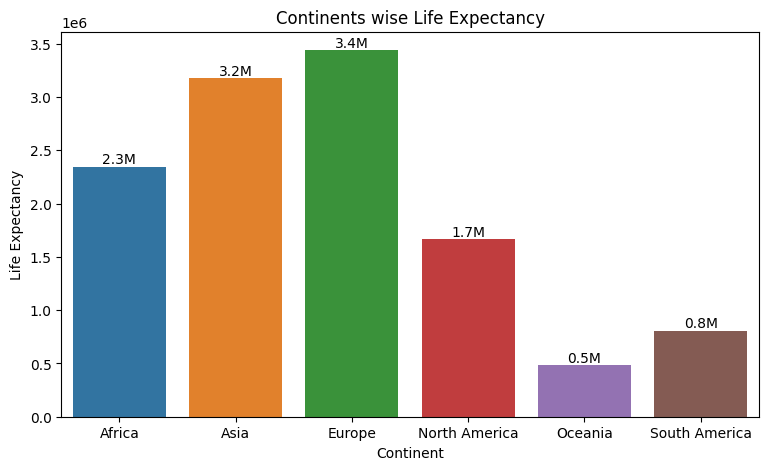

In [19]:
plt.figure(figsize=(9,5))
sns.barplot(x='continent', y='life_expectancy', data=df_continent_life_expectancy)
plt.xlabel('Continent')
plt.ylabel('Life Expectancy')
plt.title('Continents wise Life Expectancy')

#add data labels to the bars
for i in range(len(df_continent_life_expectancy)):
    plt.annotate('{:,.1f}M'.format(df_continent_life_expectancy.iloc[i]['life_expectancy']/1000000), (i,df_continent_life_expectancy.iloc[i]['life_expectancy']), ha='center',va='bottom')
plt.show()

<h1 style="text-align:left; font-weight:bold">Finding</h1>
Asia has highest population but Europe has the highest number of Total Cases, Total Deaths and Positive Rate but
  at the same time Europe has high life expectancy.

<h1 style="text-align:left; font-weight:bold">Who are more Smokers?   Males or Females</h1>

- T-testing

In [20]:
# 1. Import Libraries
from scipy import stats

# 2. T_test(Un-paired)

stat, p_value = stats.ttest_ind(df['male_smokers'],df['female_smokers'])

print("Stat: ", stat, "P_value: ", p_value)
print('-------------------------------------')
print("Average of male smokers:", round(df['male_smokers'].mean(),2))
print('-------------------------------------')
print("Average of female smokers:", round(df['female_smokers'].mean(),2))
print('-------------------------------------')
# 3. Conditional loop differ or not??
if p_value > 0.05:
    print('There is no significant difference between male and female Smokers.')
else:
    print('There is significant difference between the male smokers and female smokers.')

print("The results of t-test_ind with a p-value of 0.0 indicate that there is a statistically "
"significant difference between the means of  male smokers and female smokers being compared. "
"And average shows that the male smokers are greater than female smokers.")
print('-------------------------------------')

Stat:  668.1403456874292 P_value:  0.0
-------------------------------------
Average of male smokers: 32.79
-------------------------------------
Average of female smokers: 9.69
-------------------------------------
There is significant difference between the male smokers and female smokers.
The results of t-test_ind with a p-value of 0.0 indicate that there is a statistically significant difference between the means of  male smokers and female smokers being compared. And average shows that the male smokers are greater than female smokers.
-------------------------------------


<h1 style='text-align:left; font-weight:bold'>Correlation</h1>

In [21]:
df.corr()

C:\Users\chmud\AppData\Local\Temp\ipykernel_11984\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_cases,total_deaths,total_tests,positive_rate,female_smokers,male_smokers,life_expectancy,population
total_cases,1.000000,0.936043,0.069947,-0.035205,-0.030158,0.001711,0.019394,0.615105
total_deaths,0.936043,1.000000,0.073361,-0.040245,-0.039523,0.001001,0.015405,0.714810
total_tests,0.069947,0.073361,1.000000,0.007074,0.091008,-0.050820,0.075208,0.037577
positive_rate,-0.035205,-0.040245,0.007074,1.000000,0.069003,-0.022843,0.071514,-0.059200
female_smokers,-0.030158,-0.039523,0.091008,0.069003,1.000000,0.193861,0.429028,-0.087328
male_smokers,0.001711,0.001001,-0.050820,-0.022843,0.193861,1.000000,0.065022,0.019739
life_expectancy,0.019394,0.015405,0.075208,0.071514,0.429028,0.065022,1.000000,-0.008962
population,0.615105,0.714810,0.037577,-0.059200,-0.087328,0.019739,-0.008962,1.000000


C:\Users\chmud\AppData\Local\Temp\ipykernel_11984\4014866372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<AxesSubplot: >

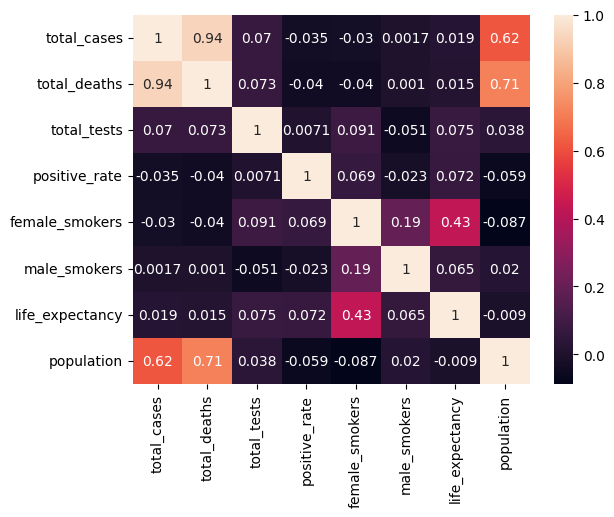

In [22]:
sns.heatmap(df.corr(), annot= True)

<h1 style="text-align:left; font-weight:bold">Finding</h1>
Male smokers are greater than female smokers.

<h1 style="text-align:left; font-weight:bold">Conclusion</h1>
                          
After analyzing the data set here are some findings:

 - Analysis shows that Asia has highest population of 4774.3B which is comparatively too high than other continents. 
 - But Asia is on 2nd position in terms of Total Cases, Positive rate, Life Expectancy but asia is at 3rd position in Death Rate.
 - Europe has less population comparatively than Asia.
 - But Europe has the highest number of Total Cases, Total Deaths and Positive Rate but at the same time Europe has high life expectancy due to their medical development.
 - Analysis also shows that there is significant difference between the male smokers and female smokers.
The results of t-test_ind with a p-value of 0.0 indicate that there is a statistically significant difference between the means of  male smokers and female smokers being compared. And average shows that the male smokers are greater than female smokers.

Analysis Shortcoming & Data Limitations

- The data set has null values more than 50% in some necessary columns. That's why I have not drop those columns.
- It is not possible to find the exact number of smokers in the world because the data set has only the percentage of smokers.
- However on average based we can conculde that male smokers are more..
- There were also duplicate values in the data set, afetr removing the duplicate values the data set size was reduced.